# Bay Wheels Visual Data (January 2020)
## by Daniel Perez

## Investigation Overview

This presentation will display and elucidate key aspects of the Bay Wheels dataset, through the explanatory visualization of  drawn conclusions made through the exploratory steps.

## Dataset Overview

The data utilized for this presentation contains information about bike trips made using Bay Wheels, a San Francisco bike share regional system owned by Lyft and operated by Motivate, during the period of January, 2020.

In [24]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [25]:
# load in the dataset into a pandas dataframe
bike_data = pd.read_csv('bay_wheels_data.csv')

In [26]:
# Converting the trip duration column from seconds to minutes, maximun at 120:
bike_data.duration_sec = (bike_data.duration_sec / 60).astype(int)
bike_data = bike_data[bike_data.duration_sec <= 120]

# renaming the column to 'duration_min':
bike_data.rename(columns={'duration_sec':'duration_min'}, inplace=True)

In [27]:
# converting the start_time column to datetime, and splitting into two columns

bike_data['day'] = bike_data['start_time'].str[8:10]
bike_data['hour_of_day'] = bike_data['start_time'].str[11:13]
bike_data['day'] = bike_data['day'].astype(int)
bike_data['hour_of_day'] = bike_data['hour_of_day'].astype(int)

# removing the 'start_time' column:

bike_data.drop(columns='start_time', inplace=True)

# rearranging the column order:

bike_data = bike_data[['duration_min', 
                       'day', 
                       'hour_of_day', 
                       'end_time', 
                       'start_station_id', 
                       'start_station_name',
                       'start_station_latitude',
                       'start_station_longitude',
                       'end_station_id',
                       'end_station_name',
                       'end_station_latitude',
                       'end_station_longitude',
                       'bike_id',
                       'user_type',
                       'bike_share_for_all_trip',
                       'rental_access_method']]

# Removing the unnecessary columns:

bike_data.drop(columns=['end_time',
                        'start_station_id',
                        'start_station_latitude',
                        'start_station_longitude',
                        'end_station_id',
                        'end_station_latitude',
                        'end_station_longitude',
                        'bike_id'], inplace=True)

## Trip Count Per Day

The number of bike trips made using Bay Wheels regional bike share system has risen steeply, reaching values 5x higher when comparing the first to the last days of the month

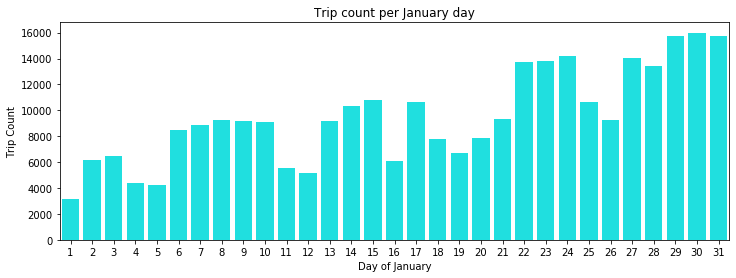

In [13]:
plt.figure(figsize=(12, 4))
sb.countplot(data = bike_data, x = 'day', color = 'cyan')
plt.title('Trip count per January day')
plt.xlabel('Day of January')
plt.ylabel('Trip Count');

## Trip Count Per Time of Day (hours)

The distribution of trips throughout the day shows a bimodal pattern led by two frequency spikes, which take place at 8 AM and 5 PM, close to the beginning and end of work hours

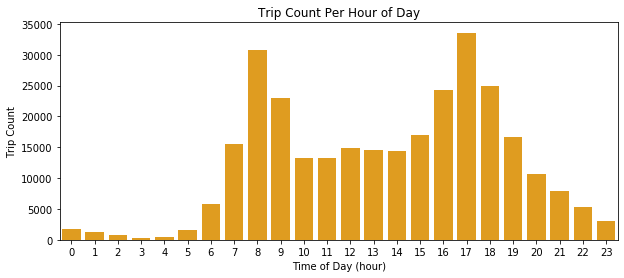

In [14]:
plt.figure(figsize=[10,4])
sb.countplot(data = bike_data, x = 'hour_of_day', color = 'orange')
plt.title('Trip Count Per Hour of Day')
plt.xlabel('Time of Day (hour)')
plt.ylabel('Trip Count');

## Trip Count Per Hour and Date

From this heatmap, we can clearly see the time of day bimodal pattern accentuating through the month, as a response to the ascending trip count

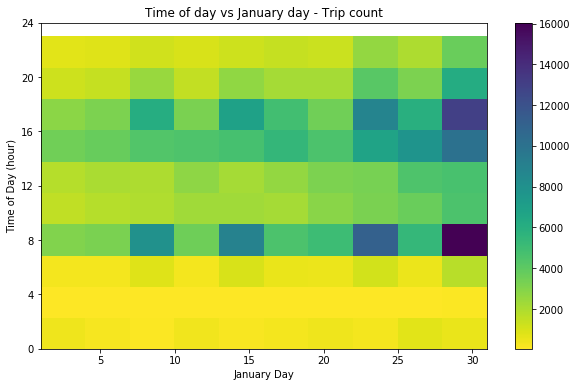

In [17]:
plt.figure(figsize=[10,6])
plt.hist2d(data = bike_data, x = 'day', y = 'hour_of_day', cmap = 'viridis_r')
plt.colorbar()
plt.title('Time of day vs January day - Trip count')
plt.xlabel('January Day')
plt.ylabel('Time of Day (hour)')
plt.yticks(np.arange(0,25,4));

## User Type Start Time Frequency
With this clustered bar chart, it becomes evident that subscribers are in bigger numbers, but with similar behaviour compared to the casual users, concerning their preferred bike trip hours

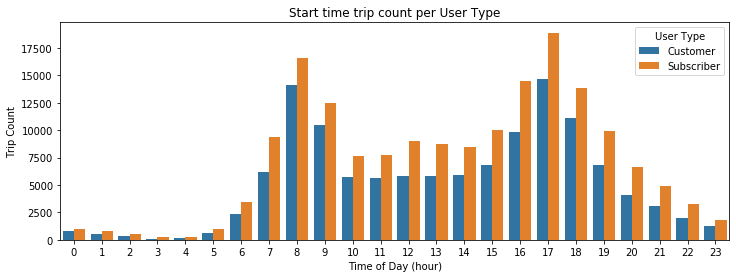

In [19]:
plt.figure(figsize=(12,4))
sb.countplot(data = bike_data, x = 'hour_of_day', hue = 'user_type')
plt.title('Start time trip count per User Type')
plt.xlabel('Time of Day (hour)')
plt.ylabel('Trip Count')
plt.legend(title='User Type');

## Trip Duration Mean by User Types

Here we can see a clear pattern of use, mostly composed by 5 to 15 minute rides. Without distinguishion between subscribers and casual users, the main objective seems to be focused around short bike trips

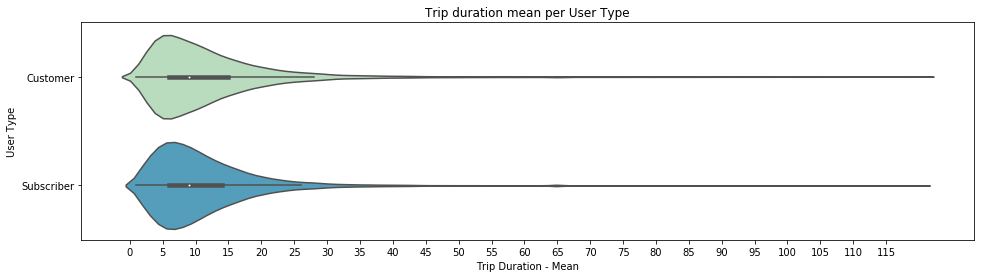

In [23]:
plt.figure(figsize=(16,4))
sb.violinplot(data = bike_data, y = 'user_type', x = 'duration_min', palette='GnBu')
x_ticks = np.arange(0, 120, 5)
plt.xticks(x_ticks)
plt.title('Trip duration mean per User Type')
plt.xlabel('Trip Duration - Mean')
plt.ylabel('User Type');

## Rental Method Frequency per User Type

It is evident an acute preference for the app rental method for both user types. Nevertheless, the Clipper card option still stands as a valid choice. It is necessary to imagine a situation where a user can see themself out of cellphone battery, perhaps without internet access, not wanting to have the app, or not having an available cellphone at all!

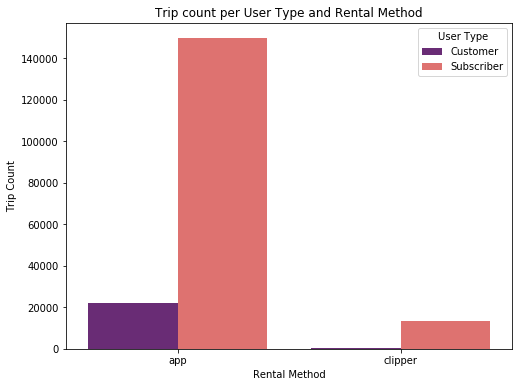

In [30]:
plt.figure(figsize=[8, 6])
sb.countplot(data = bike_data, x = 'rental_access_method', hue = 'user_type', palette='magma')
plt.title('Trip count per User Type and Rental Method')
plt.xlabel('Rental Method')
plt.ylabel('Trip Count')
plt.legend(title='User Type');

## Most Used Stations - Start and End of Bike Courses

with thousands of users per day, this transportation method will undoubtedly generate bike share 'hot spots' throughout the city, where the bike flow will be more intense due to the common user needs and habits. It is crucial for the regional system to maintain a close eye to these, as in terms of bike availability, maintenance and other questions, aiming for the users to be as satisfied as possible

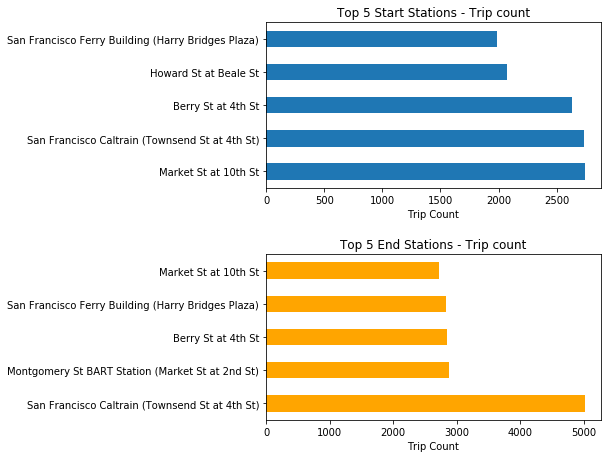

In [33]:
### Plotting the 5 most used start stations
plt.subplot(2, 1, 1)
top_5_start = bike_data.start_station_name.value_counts()[:5]
top_5_start.plot(kind='barh')
plt.title('Top 5 Start Stations - Trip count')
plt.xlabel('Trip Count')

plt.xticks()

### Plotting the 5 most used end stations
plt.subplot(2, 1, 2)
plt.subplots_adjust(bottom = -0.5, hspace = 0.4)
top_5_end = bike_data.end_station_name.value_counts()[:5]
top_5_end.plot(kind='barh', color='orange')
plt.title('Top 5 End Stations - Trip count')
plt.xticks()
plt.xlabel('Trip Count');

## Bike Share For All Usage

Bay Wheels offers a Bike Share For All program, aimed to be an economic and accessible option for bike sharing. Residents of SF Bay Area who qualify for CalFresh, SFMTA Lifeline Pass PG&E CARE utility discount qualify to participate. However, despite the trip count rise, Bike Share For All numbers haven't followed the trend. It could be a good opportunity for a revision effort concerning its features.

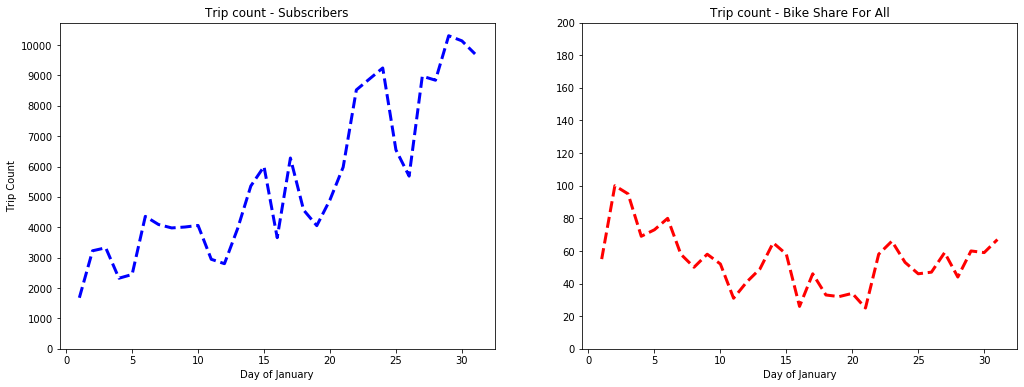

In [54]:
subs_by_day = bike_data.query('user_type == "Subscriber"').groupby('day').day.count()
bike_for_all_by_day = bike_data.query('bike_share_for_all_trip == "Yes"').groupby('day').day.count()

plt.figure(figsize=[7,6])
plt.subplot(1, 2, 1)
plt.plot(subs_by_day, color ='b', linestyle='--', linewidth= 3)
plt.xlabel('Day of January')
plt.ylabel('Trip Count')
y_ticks_1 = np.arange(0,10001,1000)
plt.yticks(y_ticks_1)
plt.title('Trip count - Subscribers')


plt.subplot(1, 2, 2)
plt.subplots_adjust(left=-1)
plt.plot(bike_for_all_by_day, color='r', linestyle='--', linewidth= 3)
plt.xlabel('Day of January')
y_ticks_2 = np.arange(0,201,20)
plt.yticks(y_ticks_2)
plt.title('Trip count - Bike Share For All');